In [1]:
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras as keras
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Dense, Reshape, Cropping2D
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.optimizers import Adam, RMSprop

c:\programdata\anaconda3\envs\animalai\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\programdata\anaconda3\envs\animalai\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\programdata\anaconda3\envs\animalai\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\programdata\anaconda3\envs\animalai\lib\site-packages\tensorf

In [2]:
## TEST FOR GPU AVAILABILITY

#tf.config.list_physical_devices('GPU')

#tf.test.is_gpu_available()

In [3]:
# LOAD DATA / IMAGES

save_dir = "../data/autoencoders/"
#envs = ['FrostbiteNoFrameskip-v4', 'MsPacmanNoFrameskip-v4', 'QbertNoFrameskip-v4', 'RiverraidNoFrameskip-v4', 'SpaceInvadersNoFrameskip-v4']
game_ID = 'Detour'
prototype_length = 20

data = np.array([np.load('../data/env_imgs/detour/npy/img_'+str(i)+'.npy') for i in np.arange(10000)])
#data = np.load('../env_imgs/'+game_ID+'.npy')

print(data.shape)

(10000, 84, 84, 3)


In [4]:
def build_model(img_shape=(84,84,3)):
    
    input_img = Input(shape=img_shape)
    filter_size = (3, 3)
    pooling_size = (2, 2)
    
    x = Conv2D(16, filter_size, activation='relu', padding='same')(input_img)
    x = MaxPooling2D(pooling_size, padding='same')(x)
    x = Conv2D(32, filter_size, activation='relu', padding='same')(x)
    x = MaxPooling2D(pooling_size, padding='same')(x)
    x = Conv2D(32, filter_size, activation='relu', padding='same')(x)
    x = MaxPooling2D(pooling_size, padding='same')(x)
    
    x = Flatten()(x)
    x = Dense(prototype_length, activation="relu")(x)
    x = Dense(11*11*32)(x)
    x = Reshape((11, 11, 32))(x)

    x = Conv2D(32, filter_size, activation='relu', padding='same')(x)
    x = UpSampling2D(pooling_size)(x)
    x = Conv2D(32, filter_size, activation='relu', padding='same')(x)
    x = UpSampling2D(pooling_size)(x)
    x = Conv2D(16, filter_size, activation='relu')(x)
    x = UpSampling2D(pooling_size)(x)
    x = Conv2D(3, filter_size, activation='relu', padding='same')(x)

    autoencoder = Model(input_img, x)
    
    optimizer = RMSprop(lr=0.001) #before 0.002
    autoencoder.compile(loss='mse', optimizer=optimizer)
    
    autoencoder.summary()
    
    return autoencoder

In [5]:
model = build_model()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 84, 84, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 84, 84, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 42, 42, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 42, 42, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 21, 21, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 32)        9248      
_________

In [ ]:
model.load_model('../data/autoencoders/detour/autoencoder.h5')

In [ ]:
model_load = False

if model_load:
    #filename = 'SpaceInvaders_20_AnimalAI_adri1.h5'
    filename = game_ID+'_'+str(prototype_length)+'_animalai_v1.h5'
    filepath = os.path.abspath(save_dir+filename)
    #filepath = os.path.abspath('./trained_autoencoders/ae_spaceinvaders_'+str(self.pl)+'.h5')
    print('filepath', filepath)
    if os.path.exists(filepath):
        print('Loading....')
        model.autoencoder = load_model(filepath)
        print('FILE '+str(filename)+' LOADED') 
    else:
        print('FILE DOES NOT EXIST')

In [6]:
history = model.fit(data, data, epochs=50, batch_size=64)
#history = model.fit(sample, sample, epochs=8000, batch_size=16)

Epoch 1/50
10000/10000 [==============================] - 101s 10ms/sample - loss: 0.0476
Epoch 2/50
10000/10000 [==============================] - 109s 11ms/sample - loss: 0.0117
Epoch 3/50
10000/10000 [==============================] - 96s 10ms/sample - loss: 0.0058
Epoch 4/50
10000/10000 [==============================] - 96s 10ms/sample - loss: 0.0043
Epoch 5/50
10000/10000 [==============================] - 96s 10ms/sample - loss: 0.0037
Epoch 6/50
10000/10000 [==============================] - 95s 10ms/sample - loss: 0.0034
Epoch 7/50
10000/10000 [==============================] - 95s 10ms/sample - loss: 0.0031
Epoch 8/50
10000/10000 [==============================] - 96s 10ms/sample - loss: 0.0029
Epoch 9/50
10000/10000 [==============================] - 96s 10ms/sample - loss: 0.0027
Epoch 10/50
10000/10000 [==============================] - 95s 10ms/sample - loss: 0.0026
Epoch 11/50
10000/10000 [==============================] - 96s 10ms/sample - loss: 0.0025
Epoch 12/50
10000

In [7]:
model.save(save_dir+game_ID+'_'+str(prototype_length)+'-test.h5')

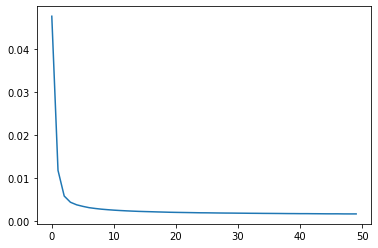

In [8]:
plt.plot(history.history['loss'])

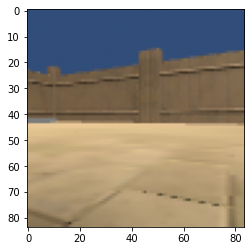

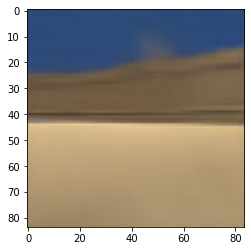

In [9]:
indx = 20

plt.imshow(data[indx])
plt.show()

plt.imshow(model.predict([[data[indx]]])[0])
plt.show()